In [1]:
!pip install -U d2l

     |████████████████████████████████| 83 kB 1.5 MB/s 


## Define 2D cross-correlation
This is same as "convolution". But, when referring to a convolution layer, a scalar bias is added.

In [2]:
import torch
from torch import nn

def corr2d(X, K):
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [3]:
X = torch.tensor([[1.0, 2.0, 3.0, 4.0, 5.0],
                  [6.0, 7.0, 2.0, 1.0, 1.0],
                  [3.0, 4.0, 5.0, 3.0, 3.0],
                  [6.0, 7.0, 8.0, 4.0, 5.0],
                  [6.0, 9.0, 6.0, 5.0, 5.0]])
K = torch.tensor([[1.0, 0.0, -1.0], 
                  [1.0, 0.0, -1.0],
                  [1.0, 0.0, -1.0]
                  ])
corr2d(X, K)

tensor([[ 0.,  5.,  1.],
        [ 0., 10.,  6.],
        [-4.,  8.,  6.]])

## Let us use torch.nn

In [13]:
conv2d = nn.Conv2d(1, 1, kernel_size = 3, padding=1, stride=1, bias=False)


In [14]:
#Convert X, K to four dimensions tensor: (batch, channel, height, width)
X = X.reshape((1, 1) + X.shape)
K = K.reshape((1, 1) + K.shape)

In [15]:
K

tensor([[[[[[ 1.,  0., -1.],
            [ 1.,  0., -1.],
            [ 1.,  0., -1.]]]]]])

In [16]:
conv2d.weight = torch.nn.Parameter(K)
conv2d.weight

Parameter containing:
tensor([[[[[[ 1.,  0., -1.],
            [ 1.,  0., -1.],
            [ 1.,  0., -1.]]]]]], requires_grad=True)

In [17]:
conv2d(X)

RuntimeError: ignored

## Let us implement LeNet

In [18]:
from d2l import torch as d2l
from torchsummary import summary

In [19]:
#define the LeNet
net = nn.Sequential(nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
                    nn.AvgPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
                    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
                    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
                    nn.Linear(120, 84), nn.Sigmoid(), nn.Linear(84, 10))

In [20]:
params = list(net.parameters())
params

[Parameter containing:
 tensor([[[[ 0.0981,  0.0484, -0.1413, -0.1723,  0.1860],
           [ 0.1824,  0.0431,  0.1030, -0.0226,  0.0220],
           [ 0.0169, -0.0754, -0.0291, -0.0630, -0.0498],
           [ 0.0433,  0.0360,  0.1445,  0.1744,  0.1989],
           [ 0.1962, -0.1617,  0.1703, -0.1877,  0.1634]]],
 
 
         [[[-0.1274, -0.1568,  0.0505,  0.1303, -0.0673],
           [ 0.0048,  0.0005,  0.1122, -0.0844, -0.1135],
           [-0.0991,  0.0166,  0.0075, -0.0066, -0.1969],
           [ 0.1392, -0.0225, -0.0364, -0.1028,  0.1711],
           [-0.0352, -0.1898,  0.1705,  0.0553, -0.0368]]],
 
 
         [[[-0.1697, -0.0379,  0.0720, -0.1922,  0.0582],
           [ 0.1588, -0.0765,  0.1950,  0.1506, -0.0097],
           [ 0.1445, -0.1627,  0.0929, -0.1288, -0.0811],
           [ 0.1848, -0.0588, -0.0477, -0.0805, -0.1137],
           [-0.1431,  0.0951,  0.1546,  0.0911, -0.0212]]],
 
 
         [[[-0.1847,  0.0770,  0.0345, -0.0928,  0.1984],
           [ 0.0096, -0.0930,  

In [21]:
net

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


In [22]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

In [23]:
def evaluate_accuracy_gpu(net, data_iter, device=None): 
    """Compute the accuracy for a model on a dataset using a GPU."""
    if isinstance(net, nn.Module):
        net.eval()  # Set the model to evaluation mode
        if not device:
            device = next(iter(net.parameters())).device
    # No. of correct predictions, no. of predictions
    metric = d2l.Accumulator(2)

    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # Required for BERT Fine-tuning (to be covered later)
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [24]:
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """Train a model with a GPU (defined in Chapter 6)."""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)

    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

KeyboardInterrupt: ignored

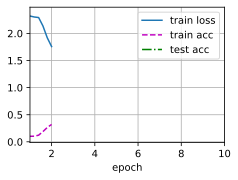

In [25]:
lr, num_epochs = 0.9, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())